### Подготовка

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:14
🔁 Restarting kernel...


In [1]:
%%bash
pip install cooler
pip install hicrep


In [2]:
%%bash
pip install cooltools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 25.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached Cython-3.0.10-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.2/145.2 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 22.7 MB/s eta 0:00:00
Using cached Cython-3.0.10-cp310-cp310-manylinux_2_17_x

In [5]:
!gdown --folder https://drive.google.com/drive/folders/1uIAsVJF-JTjkHK7VPAP8FcocDrNkoIKs

Retrieving folder contents
Processing file 1EgbiGHH9QlibIIqPPTN6yy2jUjZ2dUuo bg3_drop_diag_1K.mcool
Processing file 1v3vInwjQj2ZSRIFRqddWjJqNdYVIYIdv dm3.fa
Processing file 1rCoKe_Jy4Q4qz0eU7hAKEOBd-he6YoI0 dm3.fa.fai
Processing file 1U07cwQ3rTDtU_SoC2c9evOY6669tr55s HiC1.dm3.mapq_30.1000.mcool
Processing file 1YpD20Qa-pNc0bxQQiLz2KRee3xZZJ5UU HiC2.dm3.mapq_30.1000.mcool
Processing file 1V1XfLjVcp2cc88rC6YTS8f5f9-ksfW0c HiC3.dm3.mapq_30.1000.mcool
Processing file 1yqJKIntuaKnIGjUvlnuLi7vlO8Lno7f5 HiC4.dm3.mapq_30.1000.mcool
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1EgbiGHH9QlibIIqPPTN6yy2jUjZ2dUuo
From (redirected): https://drive.google.com/uc?id=1EgbiGHH9QlibIIqPPTN6yy2jUjZ2dUuo&confirm=t&uuid=cec3d928-1f15-4fcd-be62-5584fde37e41
To: /content/hic/bg3_drop_diag_1K.mcool
100% 248M/248M [00:09<00:00, 27.4MB/s]
Downloading...
From (original): https://drive.google.

### получить информацию и атрибуты матрицы Hi-C с помощью cooler.info


In [7]:
import matplotlib.pyplot as plt
import cooler
import numpy as np

In [8]:
import seaborn as sns
import pandas as pd
import hicrep
from hicrep import hicrepSCC
from hicrep.utils import readMcool

In [9]:
resolution = 20000
clrs = [cooler.Cooler(f'/content/hic/HiC{i+1}.dm3.mapq_30.1000.mcool::resolutions/{resolution}') for i in range(4)]

In [10]:
for clr in clrs:
  print(clr.info)

{'bin-size': 20000, 'bin-type': 'fixed', 'creation-date': '2023-04-06T04:39:00.281457', 'format': 'HDF5::Cooler', 'format-url': 'https://github.com/open2c/cooler', 'format-version': 3, 'generated-by': 'cooler-0.8.11', 'genome-assembly': 'unknown', 'metadata': {}, 'nbins': 6024, 'nchroms': 7, 'nnz': 7122786, 'storage-mode': 'symmetric-upper', 'sum': 63912926}
{'bin-size': 20000, 'bin-type': 'fixed', 'creation-date': '2023-04-06T04:16:47.610855', 'format': 'HDF5::Cooler', 'format-url': 'https://github.com/open2c/cooler', 'format-version': 3, 'generated-by': 'cooler-0.8.11', 'genome-assembly': 'unknown', 'metadata': {}, 'nbins': 6024, 'nchroms': 7, 'nnz': 7386462, 'storage-mode': 'symmetric-upper', 'sum': 61819050}
{'bin-size': 20000, 'bin-type': 'fixed', 'creation-date': '2023-04-06T04:23:11.844138', 'format': 'HDF5::Cooler', 'format-url': 'https://github.com/open2c/cooler', 'format-version': 3, 'generated-by': 'cooler-0.8.11', 'genome-assembly': 'unknown', 'metadata': {}, 'nbins': 6024,

### открыть объект cooler как сбалансированную матрицу для внутрихромосомных контактов


In [11]:
m = clrs[0].matrix(balance=True).fetch('chr2L')

### получить таблицу с координатами и контактами, они сбалансированные или нет?


In [13]:
clrs[0].pixels(join=True)[:]

,chrom1,start1,end1,chrom2,start2,end2,count
0,chr2L,0,20000,chr2L,0,20000,4075
1,chr2L,0,20000,chr2L,20000,40000,481
2,chr2L,0,20000,chr2L,40000,60000,182
3,chr2L,0,20000,chr2L,60000,80000,183
4,chr2L,0,20000,chr2L,80000,100000,84
...,...,...,...,...,...,...,...
7122781,chrX,22380000,22400000,chrX,22420000,22422827,14
7122782,chrX,22400000,22420000,chrX,22400000,22420000,1694
7122783,chrX,22400000,22420000,chrX,22420000,22422827,27
7122784,chrX,22420000,22422827,chrX,22420000,22422827,244


### получить таблицу в командной строке командой *cooler dump*


In [60]:
!cooler dump /content/hic/HiC1.dm3.mapq_30.1000.mcool::resolutions/2000 -b -t pixels  --join |head

chr2L	4000	6000	chr2L	4000	6000	230	2.18096
chr2L	4000	6000	chr2L	6000	8000	72	0.241603
chr2L	4000	6000	chr2L	8000	10000	11	0.0300638
chr2L	4000	6000	chr2L	12000	14000	20	0.0341088
chr2L	4000	6000	chr2L	14000	16000	12	0.0222663
chr2L	4000	6000	chr2L	18000	20000	1	0.0102143
chr2L	4000	6000	chr2L	22000	24000	4	0.0100723
chr2L	4000	6000	chr2L	24000	26000	2	0.00757129
chr2L	4000	6000	chr2L	26000	28000	5	0.0135086
chr2L	4000	6000	chr2L	28000	30000	4	0.0076804


### посмотрите таблицу с бинами, какие столбцы там присутствуют?


In [14]:
clrs[0].bins()[:]

,chrom,start,end,weight
0,chr2L,0,20000,0.015414
1,chr2L,20000,40000,0.012686
2,chr2L,40000,60000,0.017035
3,chr2L,60000,80000,0.010652
4,chr2L,80000,100000,0.010251
...,...,...,...,...
6019,chrX,22360000,22380000,0.028927
6020,chrX,22380000,22400000,0.020546
6021,chrX,22400000,22420000,0.040442
6022,chrX,22420000,22422827,NaN


### постройте кривые зависимости число контактов от расстояния для выбранной хромосомы (в логарифмических-координатах) для 4х реплик. Сравните их.


<ipython-input-18-606c34f883f7>:5: RuntimeWarning: Mean of empty slice
  z[i]=np.nanmean(np.diagonal(m,i))
<ipython-input-18-606c34f883f7>:6: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(len(m))*20000,np.log(z), label=f'rep {j+1}')


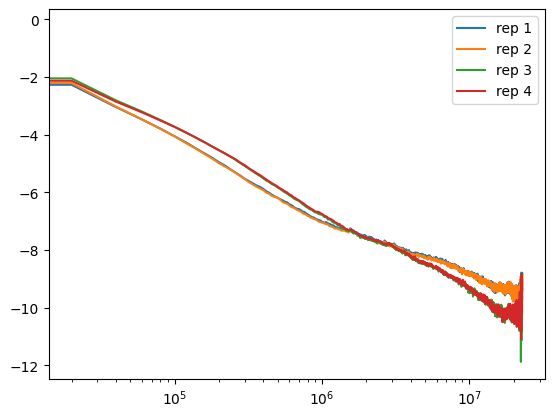

In [18]:
for j, clr in enumerate(clrs):
  m = clr.matrix(balance=True).fetch('chr2L')
  z=np.zeros(len(m))
  for i in range(len(m)):
    z[i]=np.nanmean(np.diagonal(m,i))
  plt.plot(np.arange(len(m))*20000,np.log(z), label=f'rep {j+1}')
plt.xscale('log')
plt.legend()
plt.show()

кривые для пар 1-2 и 3-4 почти совпадают. Наблюдается общая закономерность: чем больше рассояни, тем меньше контактов.


### для выбранного участка найдите insulation score и границы тадов для всех реплик


In [19]:
import cooltools
from cooltools import insulation
import cooltools.lib.plotting

In [23]:
windows = [3*resolution]

ins = [insulation(clr, windows, verbose=False) for clr in clrs]

INFO:root:fallback to serial implementation.
INFO:root:fallback to serial implementation.
INFO:root:fallback to serial implementation.
INFO:root:fallback to serial implementation.


In [24]:
ins[0]

,chrom,start,end,region,is_bad_bin,log2_insulation_score_60000,n_valid_pixels_60000,boundary_strength_60000,is_boundary_60000
0,chr2L,0,20000,chr2L,False,0.379574,1.0,NaN,False
1,chr2L,20000,40000,chr2L,False,0.359102,3.0,NaN,False
2,chr2L,40000,60000,chr2L,False,-0.066271,6.0,NaN,False
3,chr2L,60000,80000,chr2L,False,-0.202888,6.0,NaN,False
4,chr2L,80000,100000,chr2L,False,-0.506695,6.0,0.022611,False
...,...,...,...,...,...,...,...,...,...
6019,chrX,22360000,22380000,chrX,False,0.467402,4.0,NaN,False
6020,chrX,22380000,22400000,chrX,False,0.530787,1.0,NaN,False
6021,chrX,22400000,22420000,chrX,False,0.530787,1.0,NaN,False
6022,chrX,22420000,22422827,chrX,True,NaN,0.0,NaN,False


### сравните результаты и постройте графики полученных кривых. Отобразите на них границы  ТАДов.


In [25]:
def pcolormesh_45deg(ax, matrix_c, start=0, resolution=1, *args, **kwargs):
    start_pos_vector = [start+resolution*i for i in range(len(matrix_c)+1)]
    import itertools
    n = matrix_c.shape[0]
    t = np.array([[1, 0.5], [-1, 0.5]])
    matrix_a = np.dot(np.array([(i[1], i[0])
                                for i in itertools.product(start_pos_vector[::-1],
                                                           start_pos_vector)]), t)
    x = matrix_a[:, 1].reshape(n + 1, n + 1)
    y = matrix_a[:, 0].reshape(n + 1, n + 1)
    im = ax.pcolormesh(x, y, np.flipud(matrix_c), *args, **kwargs)
    im.set_rasterized(True)
    return im

from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)


In [26]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import bioframe

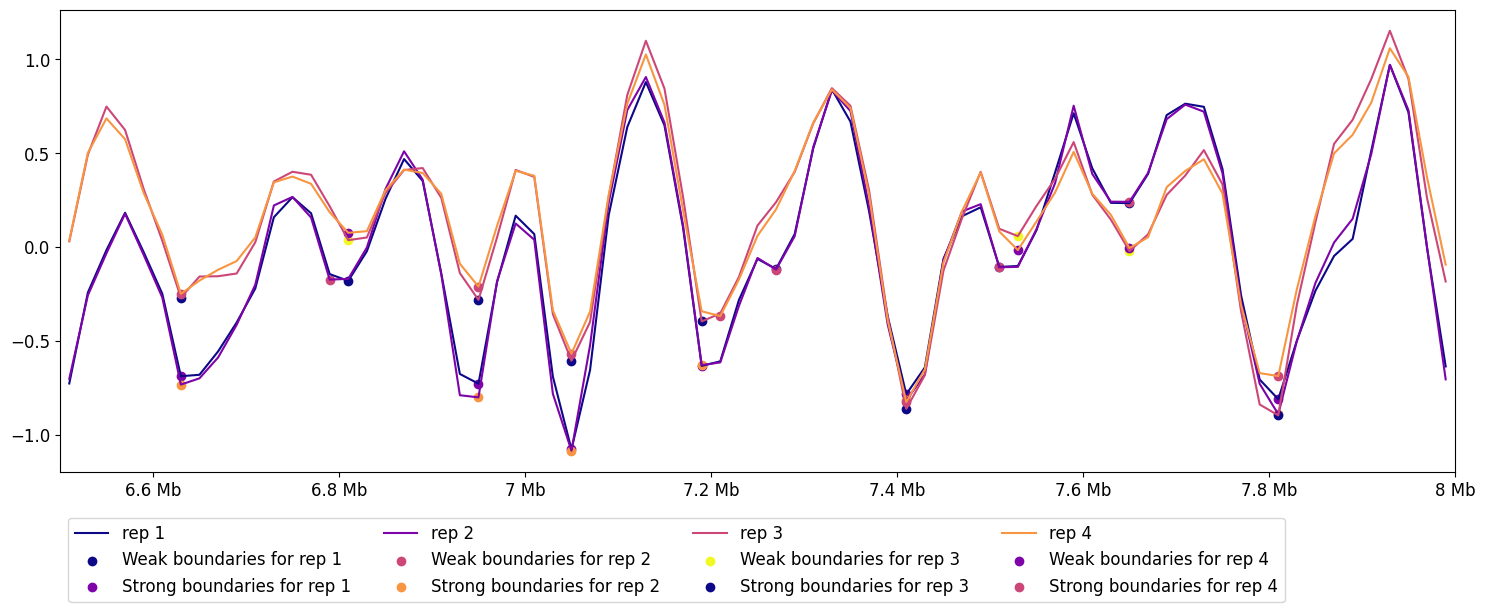

In [80]:
plt.rcParams['font.size'] = 12

start = 6_500_000
end = 8_000_000
region = ('chr2L', start, end)

for i in range(1):
  # plt.subplot(2,2,i+1)

  # clr = clrs[i]
  insulation_table = ins[i]

  norm = LogNorm(vmax=0.1, vmin=0.001)
  data = clr.matrix(balance=True).fetch(region)
  f, ax = plt.subplots(figsize=(18, 6))
  # im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
  # ax.set_aspect(0.5)
  # ax.set_ylim(0, 10*windows[0])
  # format_ticks(ax, rotate=False)
  # ax.xaxis.set_visible(False)

  divider = make_axes_locatable(ax)
  # cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
  # plt.colorbar(im, cax=cax)

  insul_region = bioframe.select(insulation_table, region)

  # ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

  ax.set_prop_cycle(plt.cycler("color", plt.cm.plasma(np.linspace(0,1,5))))
  ax.plot(insul_region[['start', 'end']].mean(axis=1),
              insul_region['log2_insulation_score_'+str(windows[0])],
              label=f'rep {i+1}')

  # ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

  format_ticks(ax, y=False, rotate=False)
  ax.set_xlim(region[1], region[2])

  boundaries = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[0]}'])]
  weak_boundaries = boundaries[~boundaries[f'is_boundary_{windows[0]}']]
  strong_boundaries = boundaries[boundaries[f'is_boundary_{windows[0]}']]
  ax.scatter(weak_boundaries[['start', 'end']].mean(axis=1),
              weak_boundaries[f'log2_insulation_score_{windows[0]}'], label=f'Weak boundaries for rep {i+1}')
  ax.scatter(strong_boundaries[['start', 'end']].mean(axis=1),
              strong_boundaries[f'log2_insulation_score_{windows[0]}'], label=f'Strong boundaries for rep {i+1}')

  ax.legend(bbox_to_anchor=(0., -0.3),loc='lower left', ncol=4)

for i in range(1,4):
  insulation_table = ins[i]
  insul_region = bioframe.select(insulation_table, region)
  ax.plot(insul_region[['start', 'end']].mean(axis=1),
              insul_region['log2_insulation_score_'+str(windows[0])],
              label=f'rep {i+1}')
  boundaries = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[0]}'])]
  weak_boundaries = boundaries[~boundaries[f'is_boundary_{windows[0]}']]
  strong_boundaries = boundaries[boundaries[f'is_boundary_{windows[0]}']]
  ax.scatter(weak_boundaries[['start', 'end']].mean(axis=1),
              weak_boundaries[f'log2_insulation_score_{windows[0]}'], label=f'Weak boundaries for rep {i+1}')
  ax.scatter(strong_boundaries[['start', 'end']].mean(axis=1),
              strong_boundaries[f'log2_insulation_score_{windows[0]}'], label=f'Strong boundaries for rep {i+1}')
  ax.legend(bbox_to_anchor=(0., -0.3),loc='lower left', ncol=4)

Можно увидеть, что  значения insulation_score наиболее близки для пар реплик 1-2 и 3-4, однако в основном наблюдаем точки экстремума в одних и тех же местах, следовательно границы ТАДов совпадают.

### Создайте 4 bed файла с границами ТАДов.В поле score добавьте силу границы.


In [125]:
for i, table in enumerate(ins):
  insul_region = bioframe.select(ins[0], region)
  insul_region= insul_region[insul_region.is_boundary_60000].reset_index()
  # insul_region.insert(3,'name', 'bound')
  insul_region['name'] = 'bound' + insul_region.index.astype(str)
  insul_region[['chrom','start','end','name','boundary_strength_60000']].to_csv(f'rep{i+1}_boundaries.bed', sep='\t',header=False,index=False)

In [126]:
!cat rep1_boundaries.bed

chr2L	6620000	6640000	bound0	0.871015368475973
chr2L	6940000	6960000	bound1	0.8951364283071389
chr2L	7040000	7060000	bound2	1.5466197771723513
chr2L	7180000	7200000	bound3	1.4734303628871612
chr2L	7400000	7420000	bound4	1.5481567320439693
chr2L	7800000	7820000	bound5	1.6896293614024718
